In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


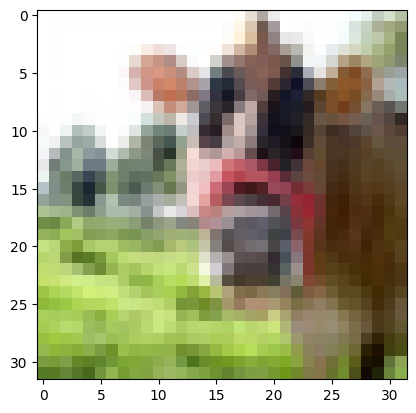

In [3]:
plt.imshow(x_train[0])

In [4]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

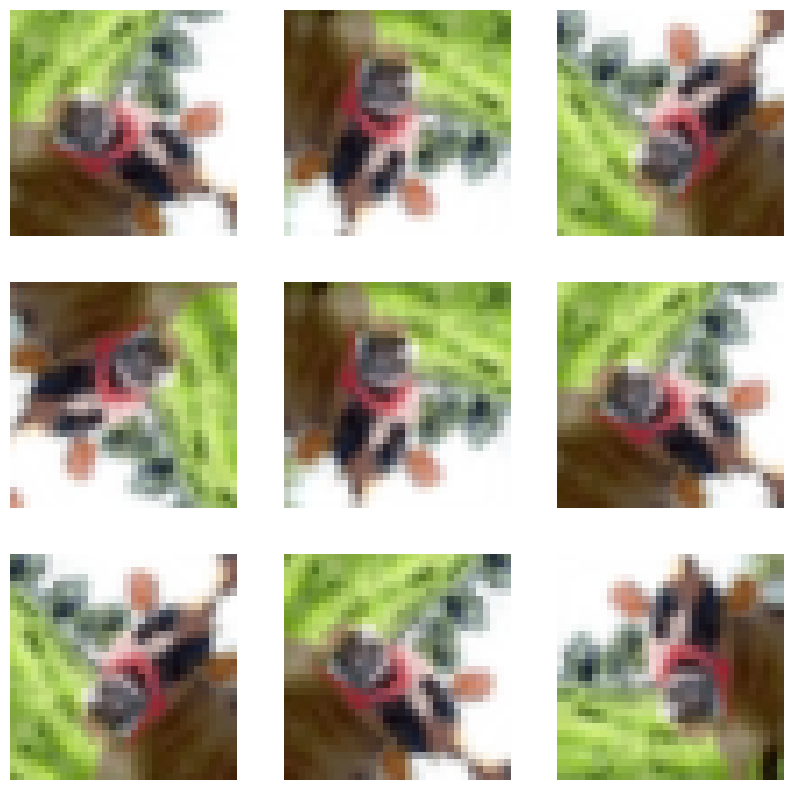

In [5]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  augmented_image = data_augmentation(tf.expand_dims(x_train[0], 0))
  plt.imshow(augmented_image[0])
  plt.axis('off')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense

In [7]:
# Define CNN model
cnn_model = Sequential([
    # Input layer
    Input(shape=(32, 32, 3)),

    # Data Augmentation
    data_augmentation,

    # Convolutional Block 1
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.3),

    # Convolutional Block 2
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.4),

    # Convolutional Block 3
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.4),

    # Convolutional Block 4
    Conv2D(512, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    # Global Average Pooling instead of Flatten
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(512, use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    Dropout(0.5),

    # Output layer (for 100 classes)
    Dense(100, activation='softmax')
])

# Print summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     1,179,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,144 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,869,348 (7.13 MB)

 Trainable params: 1,866,404 (7.12 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',   # Watch validation loss
    factor=0.5,           # Reduce LR by a factor of 0.5
    patience=3,           # Wait for 3 epochs of no improvement
    verbose=1             # Print updates
)

In [9]:
# Compile the model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [10]:
history = cnn_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.0567 - loss: 4.3942 - val_accuracy: 0.0851 - val_loss: 4.2217 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.1325 - loss: 3.6499 - val_accuracy: 0.1028 - val_loss: 4.0557 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.1810 - loss: 3.3661 - val_accuracy: 0.2365 - val_loss: 3.0752 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.2079 - loss: 3.2056 - val_accuracy: 0.1747 - val_loss: 3.5241 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.2326 - loss: 3.0949 - val_accuracy: 0.2359 - val_loss: 3.0750 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.2502 - loss: 2.9890 - val_accuracy: 0.2665 - val_loss: 2.9191 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2668 - l

In [11]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4789 - loss: 2.0211
Test Accuracy: 0.48


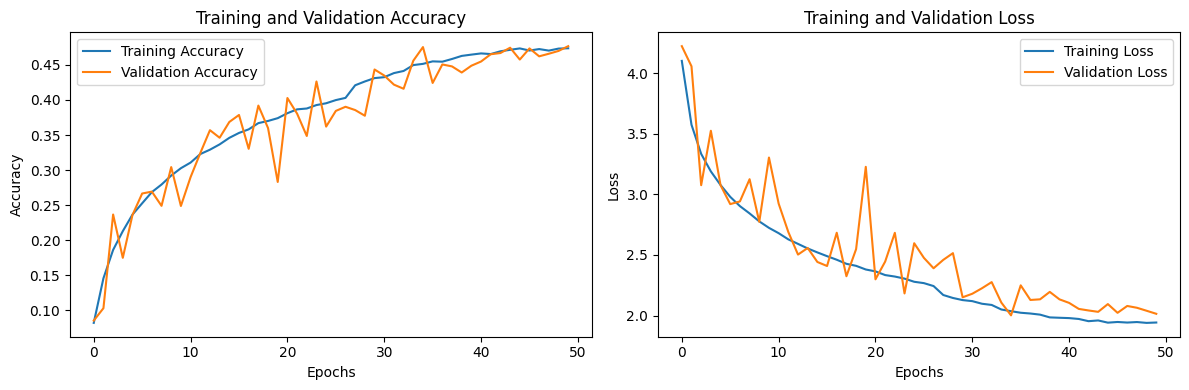

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()